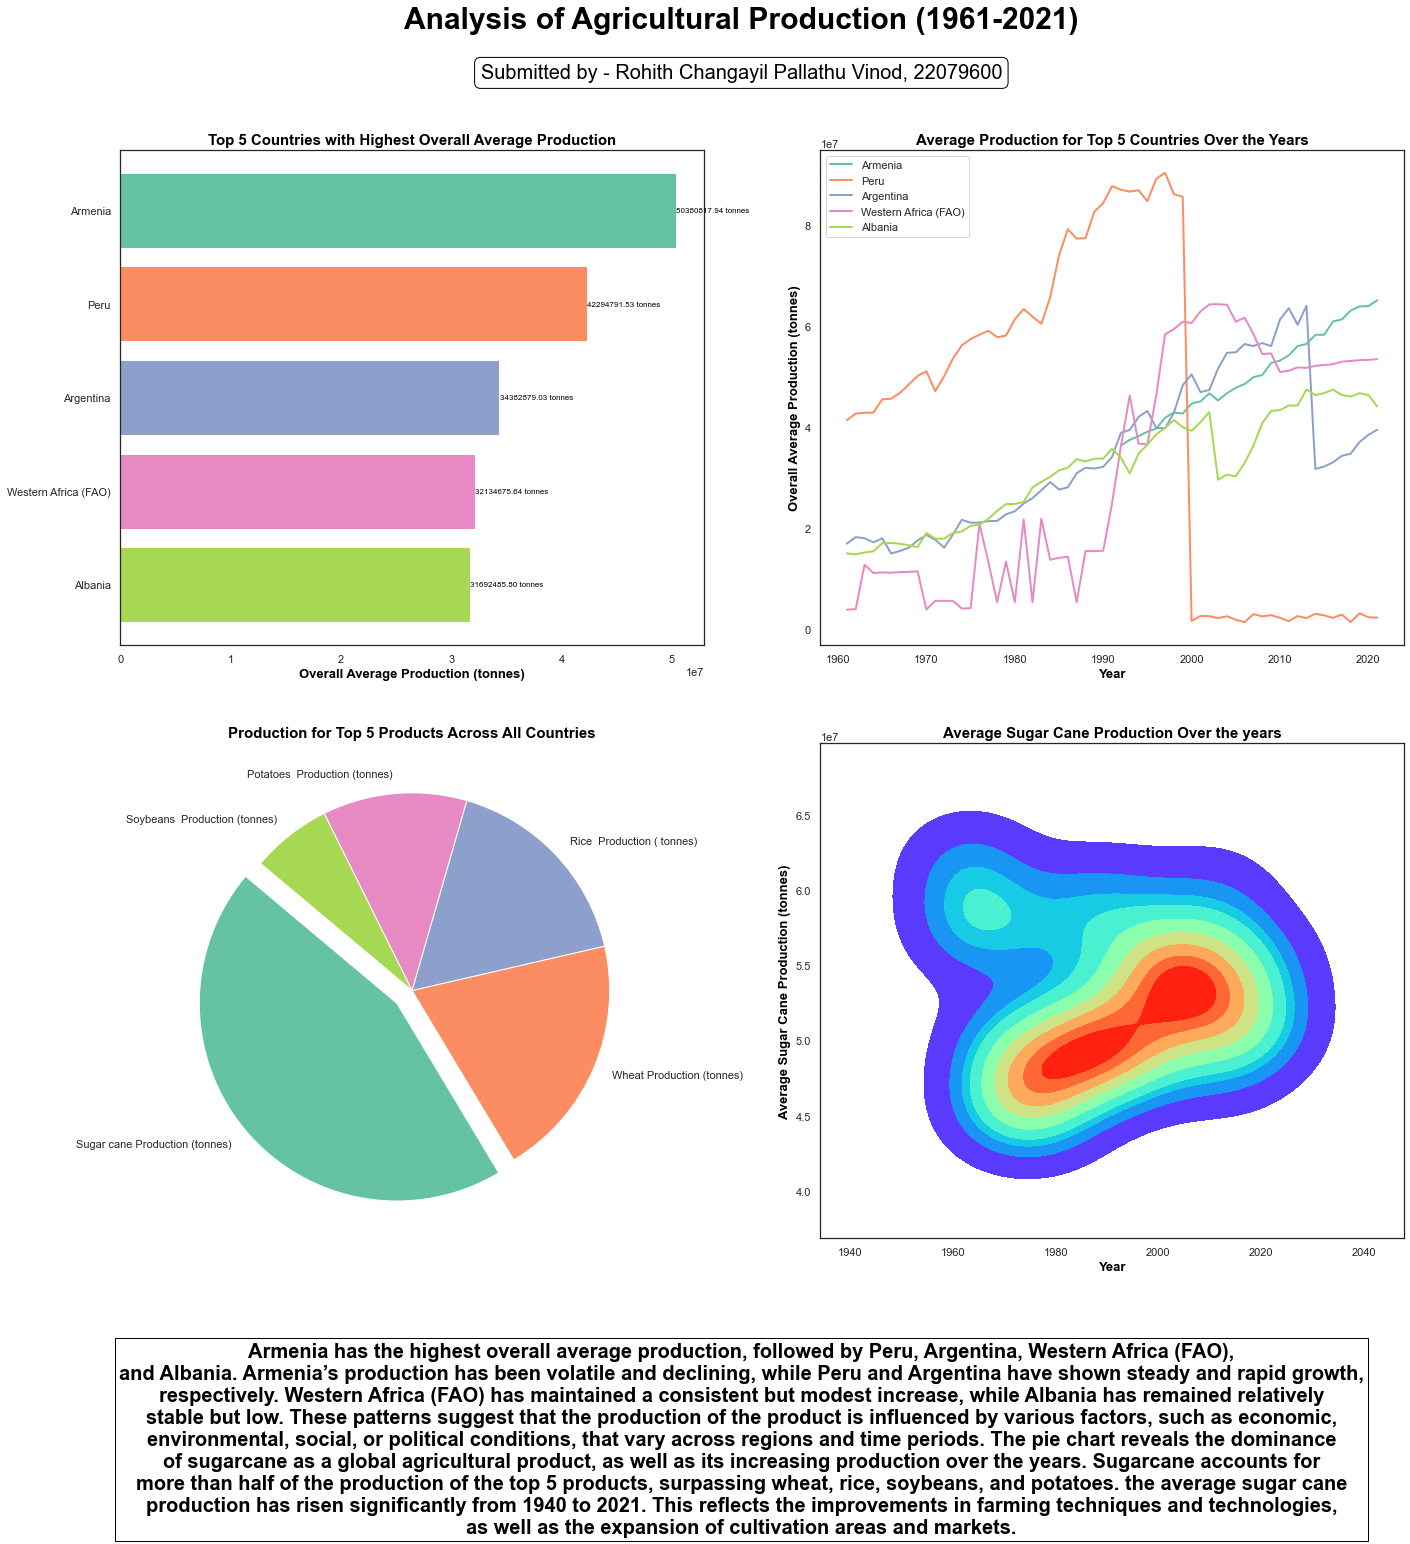

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dataset Source: https://www.kaggle.com/datasets/rafsunahmad/world-food-production/data

df = pd.read_csv('world food production.csv')
df = df[~df['Entity'].isin(['World', 'Asia'])]

sns.set(style="white")

df['Overall Average Production'] = df.iloc[:, 2:].mean(axis=1)
average_production_by_country = df.groupby('Entity')['Overall Average Production'].mean()
top_countries = average_production_by_country.sort_values(ascending=False).head(5)
colors = plt.cm.Set2(np.arange(len(top_countries)))
fig, axes = plt.subplots(2, 2, figsize=(23, 20))
bars = axes[0, 0].barh(top_countries.index, top_countries.values, color=colors)
axes[0, 0].set_xlabel('Overall Average Production (tonnes)', fontsize=13, color='black', fontweight='bold')
axes[0, 0].set_title('Top 5 Countries with Highest Overall Average Production', fontsize=15, color='black', fontweight='bold')

for bar, value in zip(bars, top_countries.values):
    axes[0, 0].text(bar.get_width() + 10000, bar.get_y() + bar.get_height()/2, f'{value:.2f} tonnes',
             va='center', ha='left', fontsize=8, color='black')
axes[0, 0].invert_yaxis()

top_countries_data = df[df['Entity'].isin(top_countries.index)]
country_colors = plt.cm.Set2(np.arange(len(top_countries)))

for i, (country, color) in enumerate(zip(top_countries.index, country_colors)):
    country_data = top_countries_data[top_countries_data['Entity'] == country]
    axes[0, 1].plot(country_data['Year'], country_data['Overall Average Production'],
             label=country, color=color, linewidth=2)

axes[0, 1].set_xlabel('Year', fontsize=13, color='black', fontweight='bold')
axes[0, 1].set_ylabel('Overall Average Production (tonnes)', fontsize=13, color='black', fontweight='bold')
axes[0, 1].set_title('Average Production for Top 5 Countries Over the Years', fontsize=15, color='black', fontweight='bold')
axes[0, 1].legend(loc='upper left')

average_production_by_entity = df.groupby('Entity').mean().iloc[:, 2:-1]
top_products_all_entities = average_production_by_entity.mean().sort_values(ascending=False).head(5)
colors_all_entities = sns.color_palette('Set2', n_colors=len(top_products_all_entities))

axes[1, 0].pie(top_products_all_entities.values, labels=top_products_all_entities.index, startangle=140, autopct='',
        explode=(0.1, 0, 0, 0, 0), colors=colors_all_entities)
axes[1, 0].set_title('Production for Top 5 Products Across All Countries', fontsize=15, color='black', fontweight='bold')

sns.set(style="darkgrid")
average_sugar_cane_production = df.groupby('Year')['Sugar cane Production (tonnes)'].mean().reset_index()

sns.kdeplot(data=average_sugar_cane_production, x='Year', y='Sugar cane Production (tonnes)', fill=True, 
            cmap='rainbow', common_norm=False, ax=axes[1, 1])

axes[1, 1].set_xlabel('Year', fontsize=13, color='black', fontweight='bold')
axes[1, 1].set_ylabel('Average Sugar Cane Production (tonnes)', fontsize=13, color='black', fontweight='bold')
axes[1, 1].set_title('Average Sugar Cane Production Over the years', fontsize=15, color='black', fontweight='bold')

fig.suptitle('Analysis of Agricultural Production (1961-2021)', ha='center', fontsize=30, color='black', fontweight='bold')
fig.text(0.5, 0.93, 'Submitted by - Rohith Changayil Pallathu Vinod, 22079600', ha='center', fontsize=20, color='black', 
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', linewidth=1))


observations = '''Armenia has the highest overall average production, followed by Peru, Argentina, Western Africa (FAO),
and Albania. Armenia’s production has been volatile and declining, while Peru and Argentina have shown steady and rapid growth,
respectively. Western Africa (FAO) has maintained a consistent but modest increase, while Albania has remained relatively
stable but low. These patterns suggest that the production of the product is influenced by various factors, such as economic,
environmental, social, or political conditions, that vary across regions and time periods. The pie chart reveals the dominance
of sugarcane as a global agricultural product, as well as its increasing production over the years. Sugarcane accounts for
more than half of the production of the top 5 products, surpassing wheat, rice, soybeans, and potatoes. the average sugar cane
production has risen significantly from 1940 to 2021. This reflects the improvements in farming techniques and technologies,
as well as the expansion of cultivation areas and markets.'''

fig.text(0.5, -0.08, observations, ha='center', fontsize=20, fontweight='bold', color='black', 
         bbox=dict(facecolor='white', edgecolor='black', linewidth=1))

plt.show()